# Binary Classification with a Tabular Kidney Stone Prediction Dataset




The dataset for this competition (both train and test) was generated from a deep learning model trained on the Kidney Stone Prediction based on Urine Analysis dataset (details below). Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## Original Dataset Description
This dataset can be used to predict the presence of kidney stones based on urine analysis.

The urine specimens, were analyzed in an effort to
determine if certain physical characteristics of the urine might be related to the
formation of calcium oxalate crystals.
The six physical characteristics of the urine are:
1. specific gravity, the density of the urine relative to water
2. pH, the negative logarithm of the hydrogen ion
3. osmolarity (mOsm), a unit used in biology and medicine but not in physical chemistry. Osmolarity is proportional to the concentration of molecules in solution
4. conductivity (mMho milliMho). One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution
5. urea concentration in millimoles per litre
6. calcium concentration (CALC) in millimolesllitre

The data is obtained from 'Physical Characteristics of Urines With and Without Crystals',a chapter from Springer Series in Statistics.

https://link.springer.com/chapter/10.1007/978-1-4612-5098-2_45

## Data Description

| Column | Description |
| :- | :- |
| gravity | specific gravity of urine |
| ph | pH of urine|
| osmo | osmolarity of urine |
| cond | conductivity of urine |
| urea | concentration of urea in urine |
| calc | concentration of calcium in urine |
| target | 0 - absence of stone, 1 - presence of stone |

In [138]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Read in Data

data = pd.read_csv("train.csv", index_col='id')
print("Data has \033[1m{} rows\033[0m and \033[1m{} columns\033[0m \n".format(data.shape[0], data.shape[1]))


# Determine number of missing values per column

print("Data has the following number of \033[1mmissing values\033[0m from each column.\n\033[1m{}\033[0m".format(data.isnull().sum()))


# Look at data summary and the head rows
print("\n\033[1mOverall data summary below\033[0m")
desc = data.describe(include='all').T
desc['null'] = data.isna().sum()
desc['type'] = data.dtypes
display(desc)
print("\n\033[1mFirst 5 rows of data below\033[0m")
display(data.head())

#Add something for duplicates

Data has 414 rows and 7 columns 

Data has the following number of missing values from each column.
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

Overall data summary below


,count,mean,std,min,25%,50%,75%,max,null,type
gravity,414.0,1.017894,0.006675,1.005,1.012,1.018,1.022,1.04,0,float64
ph,414.0,5.955459,0.642260,4.760,5.530,5.740,6.280,7.94,0,float64
osmo,414.0,651.545894,234.676567,187.000,455.250,679.500,840.000,1236.00,0,int64
cond,414.0,21.437923,7.514750,5.100,15.500,22.200,27.600,38.00,0,float64
urea,414.0,278.657005,136.442249,10.000,170.000,277.000,385.000,620.00,0,int64
calc,414.0,4.114638,3.217641,0.170,1.450,3.130,6.630,14.34,0,float64
target,414.0,0.444444,0.497505,0.000,0.000,0.000,1.000,1.00,0,int64



First 5 rows of data below


,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


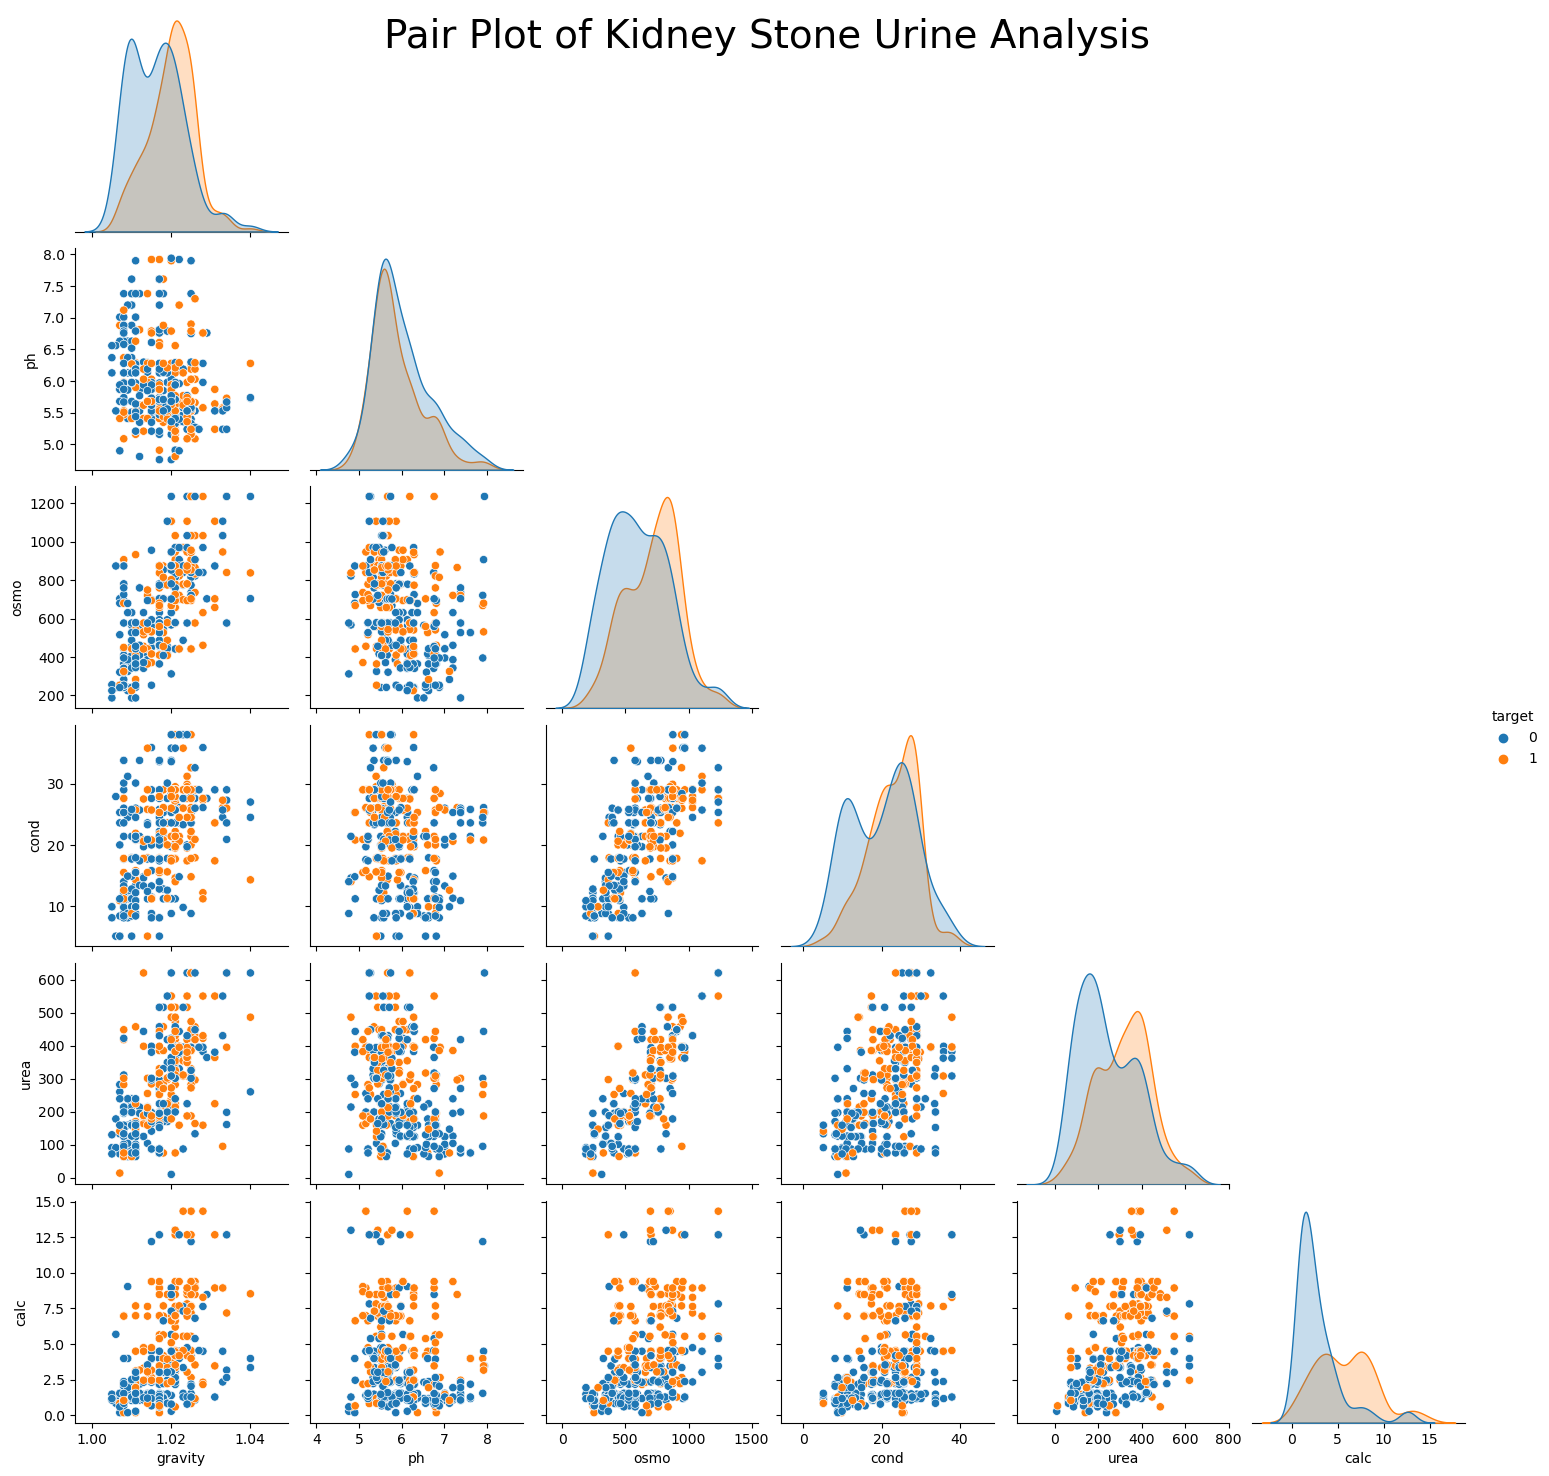

In [145]:
sns.pairplot(data,hue="target", corner=True)

plt.suptitle('Pair Plot of Kidney Stone Urine Analysis', size = 28)

plt.show()

In [140]:
# Function to calculate correlation coefficient between two arrays
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

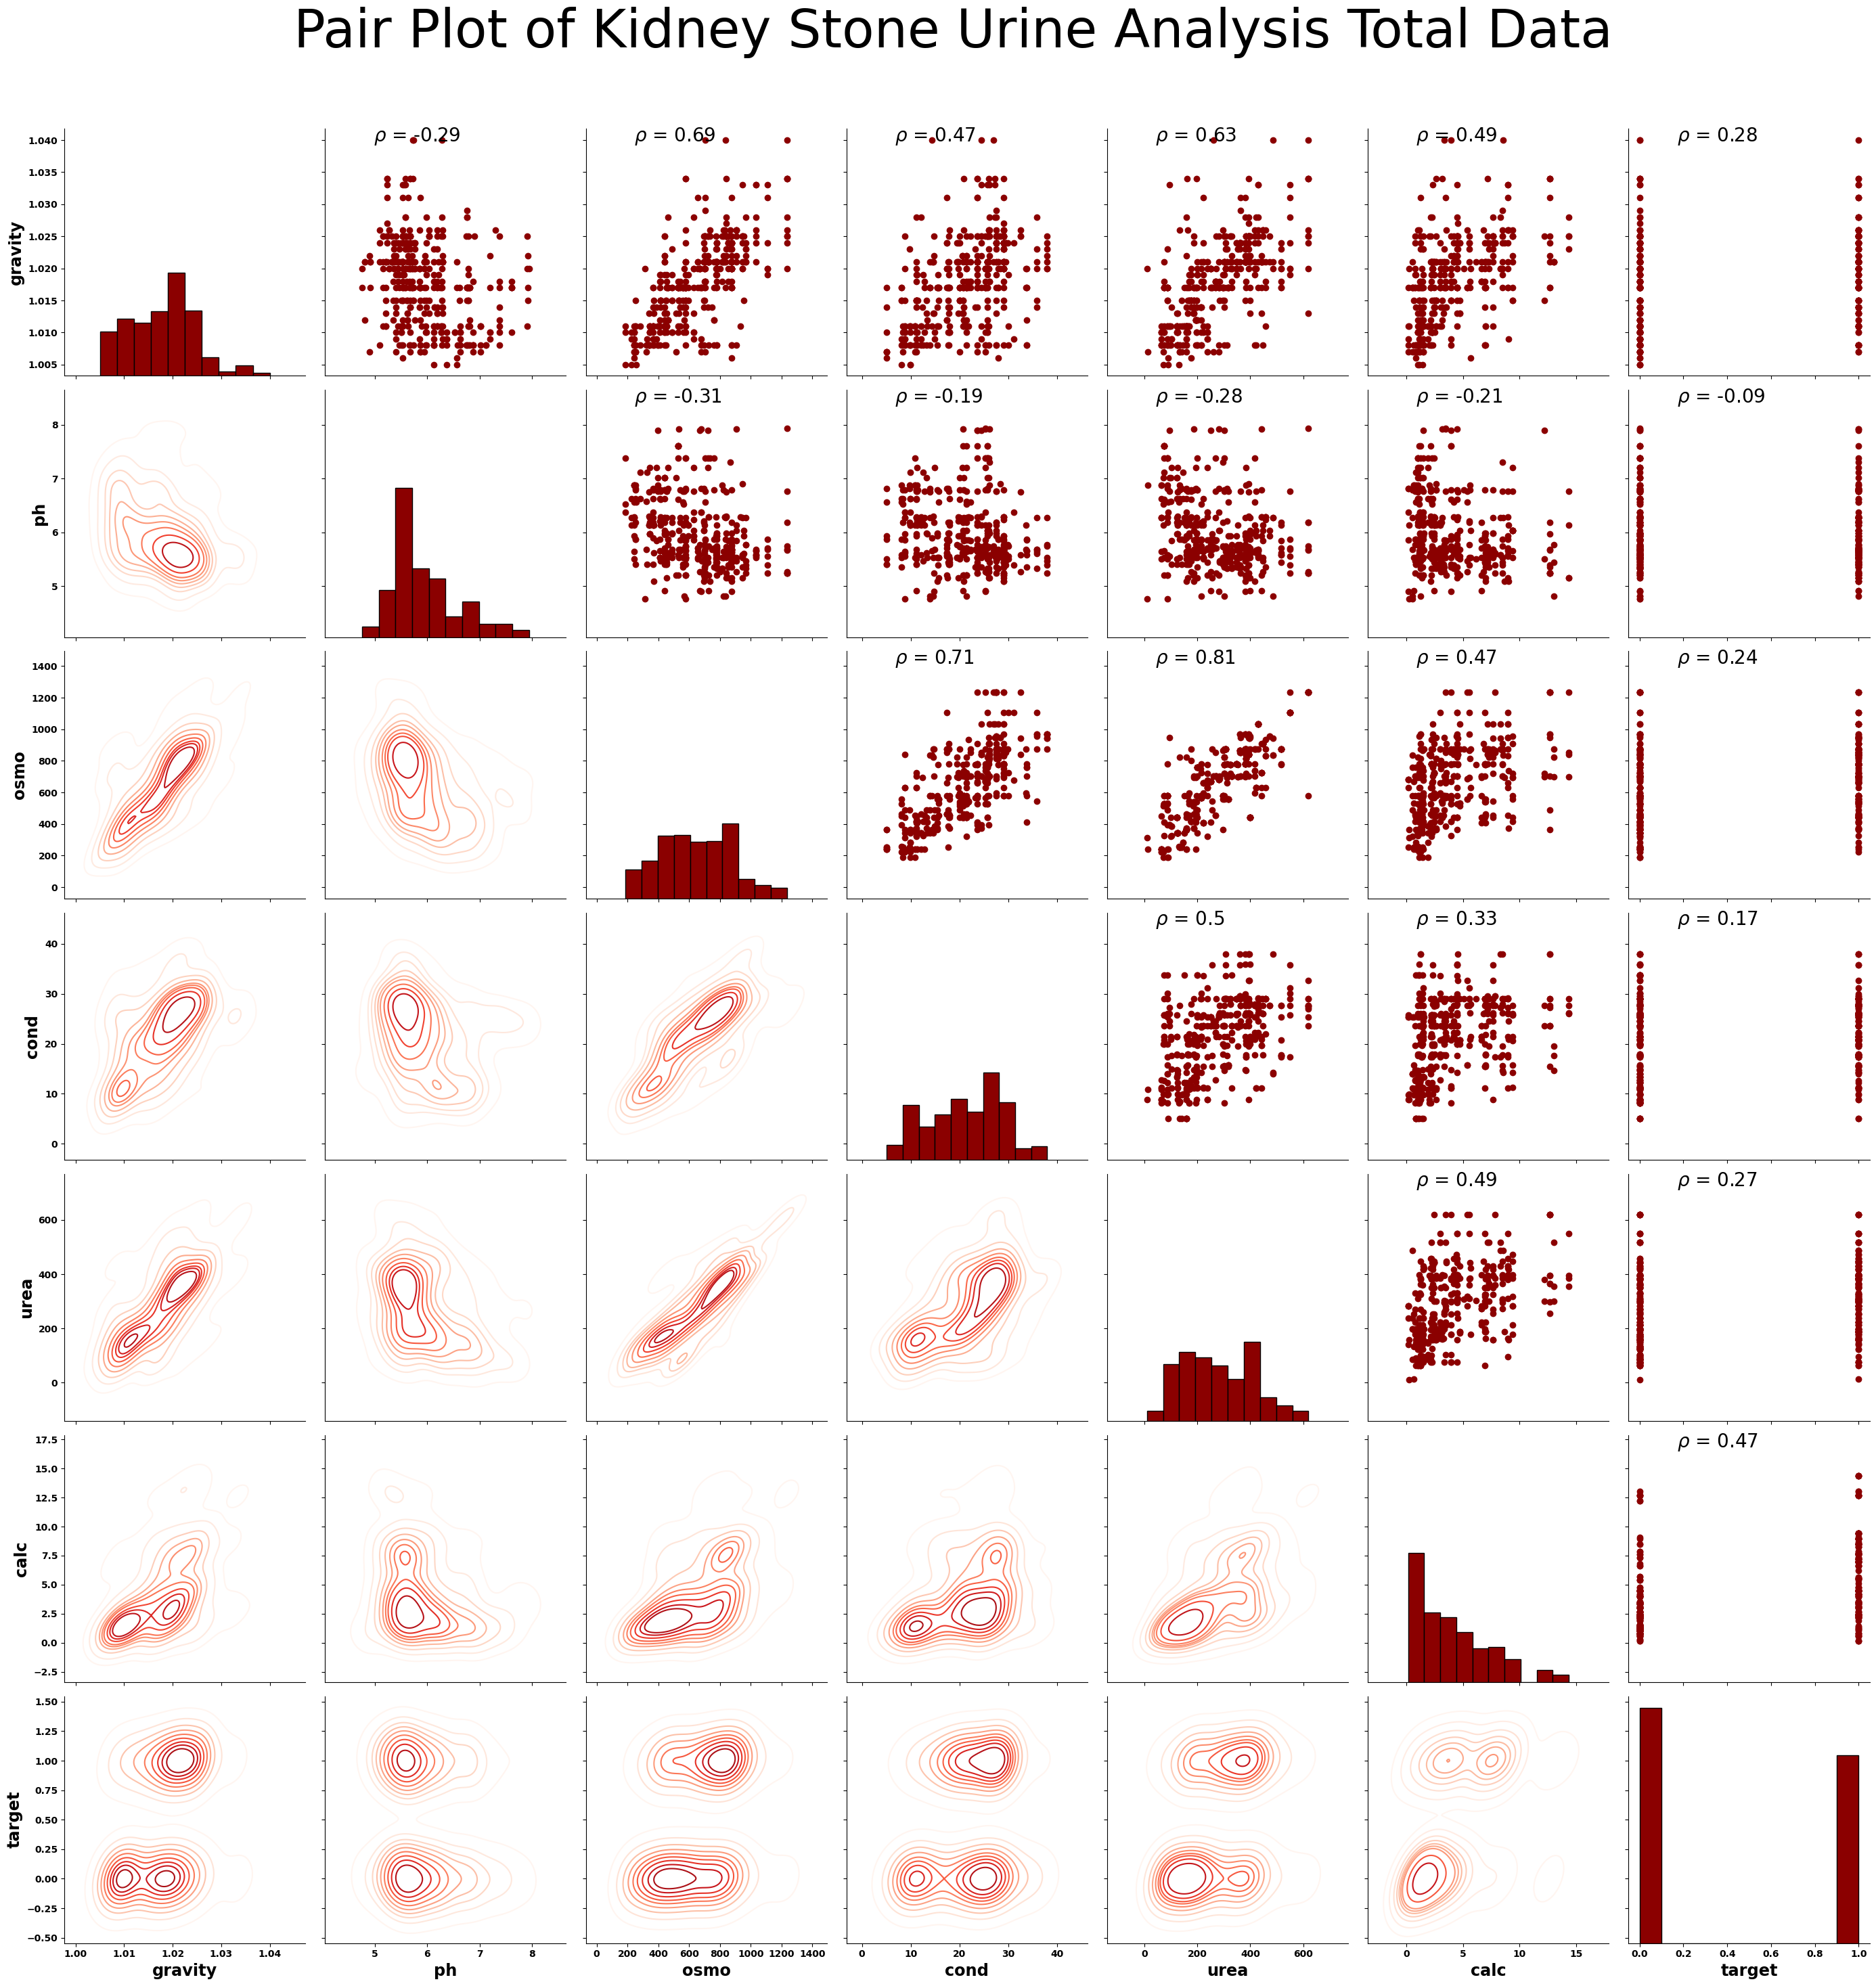

In [149]:
# Create a pair grid instance
grid = sns.PairGrid(data, vars = list(data.columns), height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

for i in range(len(grid.axes)):
    grid.axes[i,0].yaxis.label.set_fontweight('bold')
    grid.axes[i,0].yaxis.label.set_fontsize('xx-large')
    for tick in grid.axes[i,0].yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')
    
    grid.axes[len(grid.axes)-1,i].xaxis.label.set_fontweight('bold')
    grid.axes[len(grid.axes)-1,i].xaxis.label.set_fontsize('xx-large')
    for tick in grid.axes[len(grid.axes)-1,i].xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.suptitle('Pair Plot of Kidney Stone Urine Analysis Total Data', size = 56, y=1.05)

plt.show()

#change correlation to heatmap

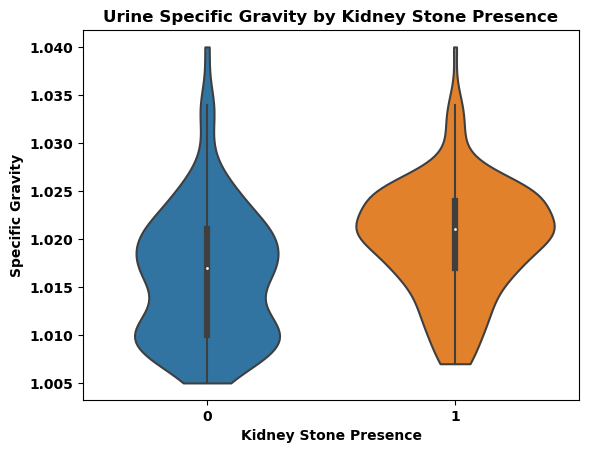

In [150]:
vplot = sns.violinplot(data=data,x='target', y='gravity', cut=0)
vplot.set_ylabel('Specific Gravity', fontweight='bold')
vplot.set_xlabel('Kidney Stone Presence', fontweight='bold')
vplot.set_title('Urine Specific Gravity by Kidney Stone Presence', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.show()

#Change violine plots to subplots with no more than 2 plots per row

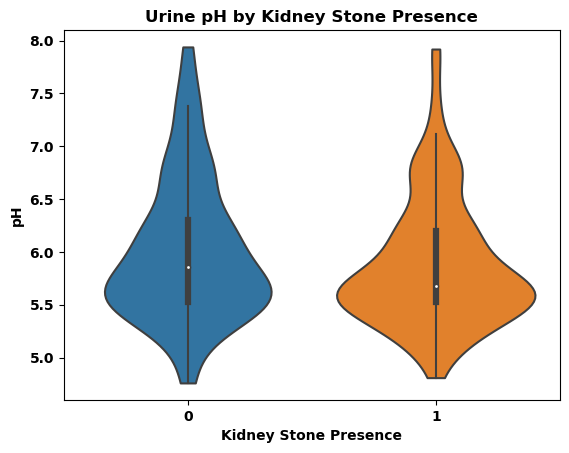

In [103]:
vplot = sns.violinplot(data=data,x='target', y='ph', cut=0)
vplot.set_ylabel('pH', fontweight='bold')
vplot.set_xlabel('Kidney Stone Presence', fontweight='bold')
vplot.set_title('Urine pH by Kidney Stone Presence', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.show()

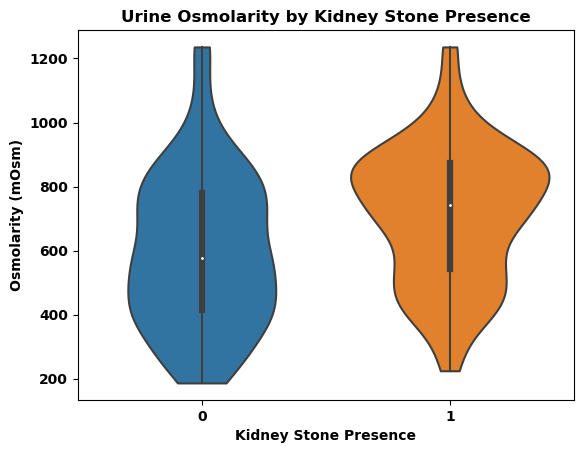

In [104]:
vplot = sns.violinplot(data=data,x='target', y='osmo', cut=0)
vplot.set_ylabel('Osmolarity (mOsm)', fontweight='bold')
vplot.set_xlabel('Kidney Stone Presence', fontweight='bold')
vplot.set_title('Urine Osmolarity by Kidney Stone Presence', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.show()

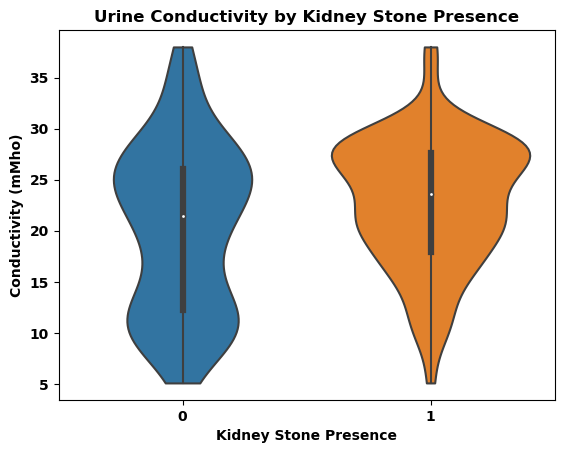

In [105]:
vplot = sns.violinplot(data=data,x='target', y='cond', cut=0)
vplot.set_ylabel('Conductivity (mMho)', fontweight='bold')
vplot.set_xlabel('Kidney Stone Presence', fontweight='bold')
vplot.set_title('Urine Conductivity by Kidney Stone Presence', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.show()

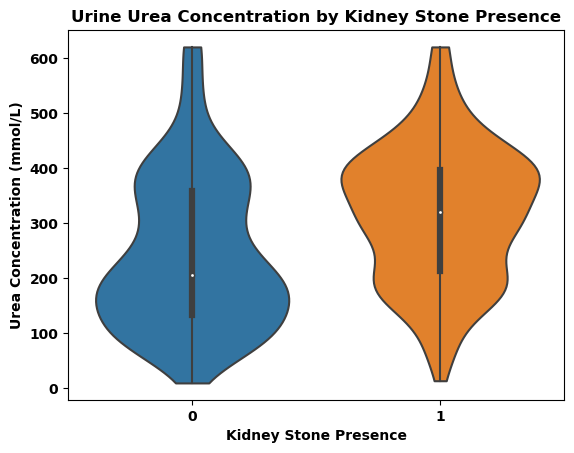

In [106]:
vplot = sns.violinplot(data=data,x='target', y='urea', cut=0)
vplot.set_ylabel('Urea Concentration (mmol/L)', fontweight='bold')
vplot.set_xlabel('Kidney Stone Presence', fontweight='bold')
vplot.set_title('Urine Urea Concentration by Kidney Stone Presence', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.show()

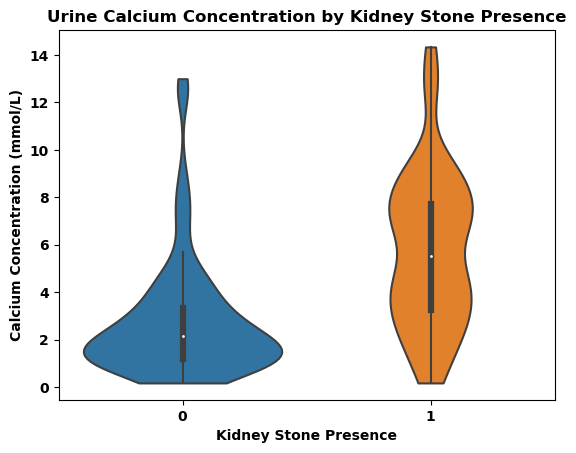

In [107]:
vplot = sns.violinplot(data=data,x='target', y='calc', cut=0)
vplot.set_ylabel('Calcium Concentration (mmol/L)', fontweight='bold')
vplot.set_xlabel('Kidney Stone Presence', fontweight='bold')
vplot.set_title('Urine Calcium Concentration by Kidney Stone Presence', fontweight='bold')

for tick in vplot.yaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

for tick in vplot.xaxis.get_major_ticks():
        tick.label.set_fontweight('bold')

plt.show()

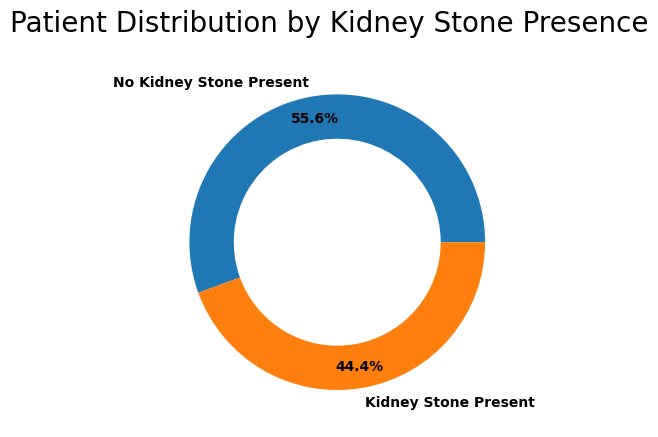

In [137]:
target_data = pd.DataFrame(data.groupby('target')['target'].count())
labels = ['No Kidney Stone Present', 'Kidney Stone Present']

plt.pie(target_data['target'], labels=labels, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.3),
        textprops={'weight': 'bold'})

plt.suptitle('Patient Distribution by Kidney Stone Presence', size = 20)

plt.show()